### Student Information
Name: 林雨慶

Student ID: 111033624

GitHub ID: tomqwrtyu

Kaggle name: LinArG4818

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

0. Splitting into 2 repo is very very inconvenient!

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

In [3]:
### Begin Assignment Here

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [4]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
trCV = CountVectorizer()
teCV = CountVectorizer()
trainF = trCV.fit_transform(train_df['text'])
testF = teCV.fit_transform(test_df['text'])
tridx_freq = []
teidx_freq = []
for i in range(trainF.shape[1]):
    tridx_freq.append((i, trainF.getcol(i).count_nonzero()))
for i in range(testF.shape[1]):
    teidx_freq.append((i, testF.getcol(i).count_nonzero()))
tridx_freq.sort(key = lambda x: x[1])
teidx_freq.sort(key = lambda x: x[1])
trtop30idx = [tridx_freq[i][0] for i in range(30)]
tetop30idx = [teidx_freq[i][0] for i in range(30)]
print("Train: ", trCV.get_feature_names_out()[trtop30idx])
print("Test: ", teCV.get_feature_names_out()[tetop30idx])

Train:  ['000' '00pm' '00tiffanyr' '01' '02' '03' '0303' '034' '04' '08' '080'
 '09' '095' '100000000' '100g' '100s' '104' '10am' '10carley' '1133' '119'
 '11yo' '123' '133' '134' '13c' '1400' '147' '1564' '16']
Test:  ['10' '11' '12s' '138' '158' '15gets20' '16' '17' '1st' '22' '25' '250'
 '2day' '2k' '2nd' '340' '50' '500' '5livesport' '7lw' '892'
 '__netflixnchill' 'a3' 'a79l' 'aaliyahlove69' 'abomination' 'abra'
 'academics' 'accept' 'accidentally']


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [6]:
# Answer here
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
tfvc = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
tfvc.fit(train_df['text'])
tfvc.get_feature_names_out()[100:110]

c:\Python310\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

**Answer here** <p>
The diagonal (i.e. cm[i, j] where i == j) means the number the classifier predict correctly, while the others (i.e. cm[i, j] where i != j) means the number of misclassification.
And we can take insight into one label, taking 'fear' for example: 76 is "true positive", the row of 'fear' exclusive of '76' (i.e. [16, 8, 10]) is "false positive", the column of 'fear' exclusive of '76' (i.e. [[20], [8], [11]]) is "false negative",  the others of confusion matrix (i.e. [[55, 5, 4], [7, 54, 10], [9, 10, 44]]) are 'true negative'.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [7]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

my_tags = ['anger', 'fear', 'joy', 'sadness']

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

c:\Python310\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


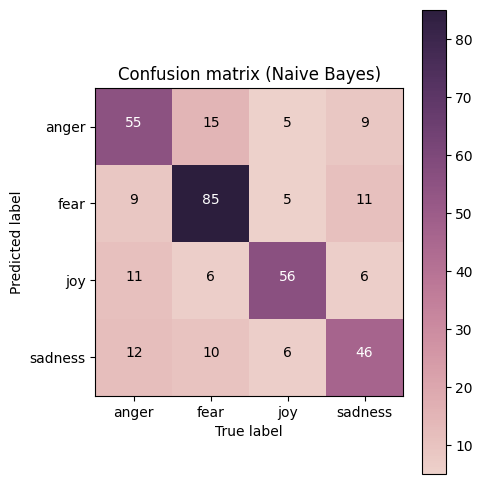

In [8]:
# Answer here 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predResult = mnb.predict(X_test)
cm2 = confusion_matrix(y_true=y_test, y_pred=predResult) 
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix (Naive Bayes)')


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [10]:
from sklearn.tree import DecisionTreeClassifier
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_test_pred = DT_model.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

In [11]:
# Answer here
def mutipleLabelMetrics(cm, label):
    numLabel = len(label)
    interpretedCm = dict()
    total = np.sum(cm)
    for i in range(numLabel):
        tp = cm[i, i]
        fn = np.sum(cm[:, i]) - tp
        fp = np.sum(cm[i, :]) - tp
        tn = total - tp - fp - fn
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        accuracy =  (tp + tn) / (tp + fp + tn + fn)
        f_score = 2 * precision * recall / (precision + recall)
        interpretedCm[label[i]] = [precision, recall, accuracy, f_score]

    return pd.DataFrame.from_dict(interpretedCm, orient='index', columns=['precision', 'recall', 'accuracy', 'f-score'])

decisionTreeMetrics = mutipleLabelMetrics(cm, my_tags)
naiveBayesMetrics = mutipleLabelMetrics(cm2, my_tags)
print(decisionTreeMetrics)
print("------------------------------------------------")
print(naiveBayesMetrics)
print("------------------------------------------------")
print("By comparing the f-score of these two classifer, I found that Naive-Bayes did better than Decision Tree in this case," \
       ,"it may caused by enough independence among features and not enough depth for decision tree(i.e. less features are selected).")
print("And I think the unfavorable result is due to limiting the 10115 features to 500 with top term frequencies while ignoring the meaning" \
       ,"of the words. Maybe we can find a way to utilize tf-idf vectors and somehow get a better result.")

         precision    recall  accuracy   f-score
anger     0.654762  0.632184  0.824207  0.643275
fear      0.690909  0.660870  0.789625  0.675556
joy       0.683544  0.701299  0.861671  0.692308
sadness   0.594595  0.647059  0.844380  0.619718
------------------------------------------------
         precision    recall  accuracy   f-score
anger     0.654762  0.632184  0.824207  0.643275
fear      0.772727  0.732759  0.838617  0.752212
joy       0.708861  0.777778  0.887608  0.741722
sadness   0.621622  0.638889  0.844380  0.630137
------------------------------------------------
By comparing the f-score of these two classifer, I found that Naive-Bayes did better than Decision Tree in this case, it may caused by enough independence among features and not enough depth for decision tree(i.e. less features are selected).
And I think the unfavorable result is due to limiting the 10115 features to 500 with top term frequencies while ignoring the meaning of the words. Maybe we can find a wa

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [12]:
training_log = pd.read_csv("logs/training_log.csv")

In [14]:
# Answer here
import plotly.express as px
fig = px.line(training_log, x='epoch', y=['loss', 'val_loss'])
fig.show()

##### ``Observation``
The result shows that it's apparently an overfitting case since it cannot peform well on data that never seen before, we can collect more trainning dataset or decreasing the number of features to alleviate this situation.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


**Answer here** <p>
wtf is "our" model

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

load ok


c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



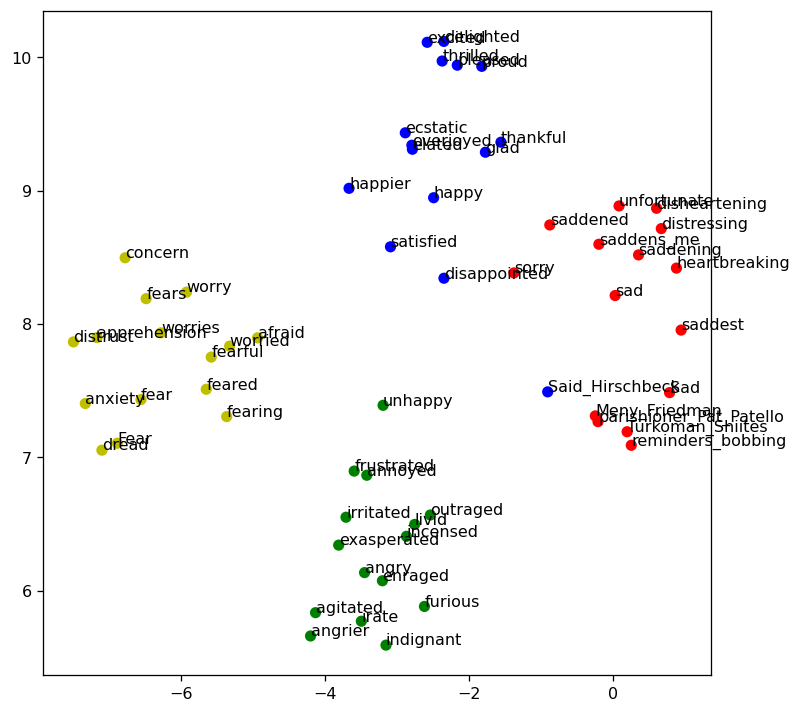

In [15]:
# Answer here
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

model_path = "GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

topn2 = 14
target_words_2 = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn2)] \
              +['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn2)] \
              +['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn2)] \
              +['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn2)]

cn2 = topn2 + 1
color2 = ['b'] * cn2 + ['g'] * cn2 + ['r'] * cn2 + ['y'] * cn2
              
X_train2 = w2v_google_model[target_words_2]
tsne2 = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne2 = tsne2.fit_transform(X_train2)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne2[:len(target_words_2), 0], X_tsne2[:len(target_words_2), 1], c=color2)
for label, x, y in zip(target_words_2, X_tsne2[:len(target_words_2), 0], X_tsne2[:len(target_words_2), 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()